# Visualizing Earnings Based On College Majors - Matplotlib (Python)
---


*Its friday evening in Toronto and i just made green tea with a punch of awesome Cinnamon, Cardamom, Raw Turmetic, and Honey. I am just about to take a sip and I receive a call from one of my friends asking for advice on the colleges in the USA.
Luckily, i have some data, and guess what i know a thing or two about how to make data speak. 
So, lets take a sip of awesomness and get some answers for my friend*


## Introduction

We have a dataset on the job outcomes of students who graduated from college. The data on job outcomes is released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.


## Import libraries


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Opening the Data Set

In [2]:
recent_grads = pd.read_csv("/Users/deepmanyusuhag/Desktop/Courses/Dataquest/Step2/recent-grads.csv")

So now the data is read into a DataFrame. To become familiar with how the data is structured, We:
1. Check the first row formatted as a table.
2. Check the first and the last row.

Let's start exploring the data and making some basic modifications to the dataset.
* Generate summary statistics for all of the numeric columns using DataFrame.describe().
* Next we drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [3]:
print(recent_grads.iloc[0])
print(recent_grads.head(1))
print(recent_grads.tail(1))
recent_grads.describe()

### initial count of rows ###
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

### removing the missing values ###
recent_grads = recent_grads.dropna()

### final count of rows ###
cleaned_data_count = recent_grads.shape[0]

### rows removed ###
print(raw_data_count - cleaned_data_count)

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

We notice that only one row contained missing values and was dropped.

Text(0.5, 1.0, 'Sample Size vs Median Salary')

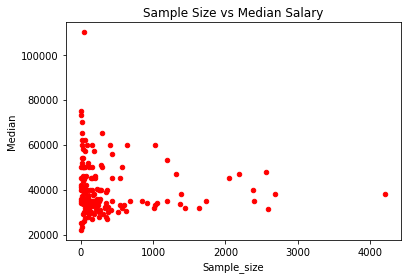

In [4]:
ax1 = recent_grads.plot(x="Sample_size", y="Median", kind="scatter", color="red")
ax1.set_title("Sample Size vs Median Salary")

Text(0.5, 1.0, 'Sample Size vs Unemployment Rate')

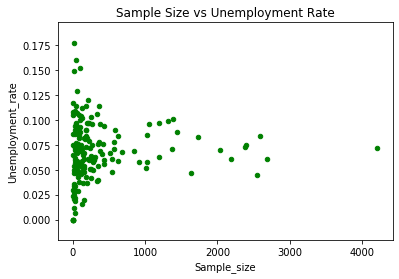

In [5]:
ax2 = recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter", color="green")
ax2.set_title("Sample Size vs Unemployment Rate")

Text(0.5, 1.0, 'Full Time vs Median')

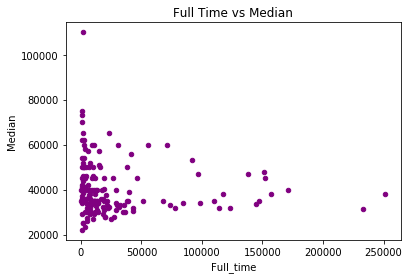

In [6]:
ax3 = recent_grads.plot(x="Full_time", y="Median", kind="scatter", color="purple")
ax3.set_title("Full Time vs Median")

Text(0.5, 1.0, '% Women vs Unemployment Rate')

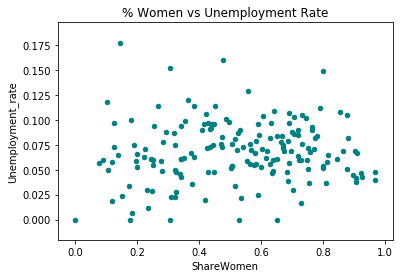

In [7]:
ax4 = recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter", color="teal")
ax4.set_title("% Women vs Unemployment Rate")

Text(0.5, 1.0, 'Male Graduates vs Median')

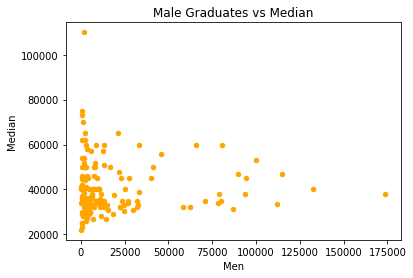

In [8]:
ax5 = recent_grads.plot(x="Men", y="Median", kind="scatter", color="orange")
ax5.set_title("Male Graduates vs Median")

ax6 = recent_grads.plot(x="Women", y="Median", kind="scatter", color="black")
ax6.set_title("Female Graduates vs Median")

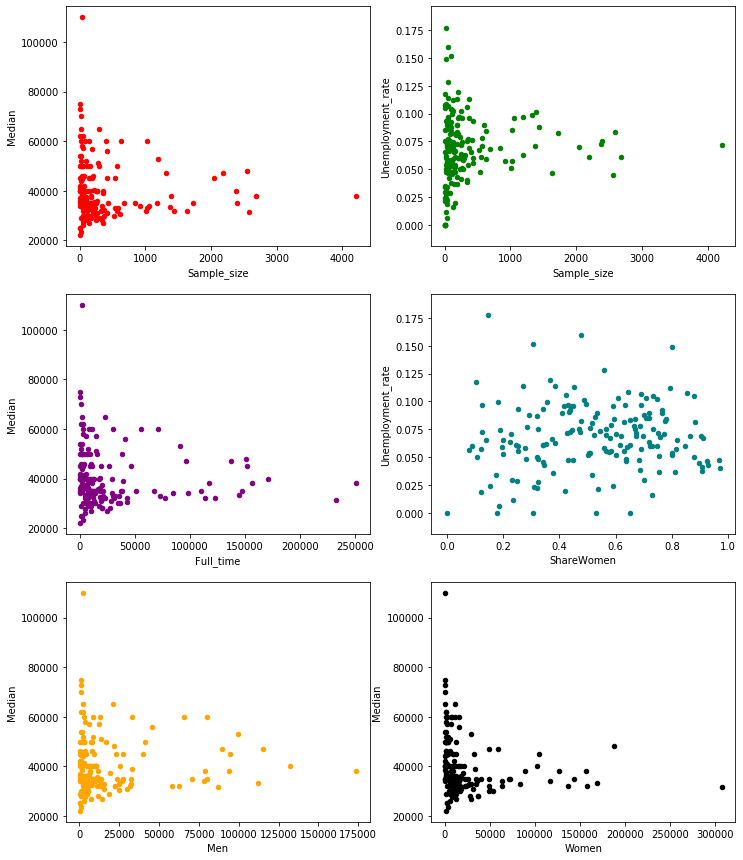

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,15))
ax_1 = recent_grads.plot(ax=axes[0,0], x="Sample_size", y="Median", kind="scatter", color="red")
ax_2 = recent_grads.plot(ax=axes[0,1], x="Sample_size", y="Unemployment_rate", kind="scatter", color="green")
ax_3 = recent_grads.plot(ax=axes[1,0], x="Full_time", y="Median", kind="scatter", color="purple")
ax_4 = recent_grads.plot(ax=axes[1,1], x="ShareWomen", y="Unemployment_rate", kind="scatter", color="teal")
ax_5 = recent_grads.plot(ax=axes[2,0], x="Men", y="Median", kind="scatter", color="orange")
ax_6 = recent_grads.plot(ax=axes[2,1], x="Women", y="Median", kind="scatter", color="black")

## add data here about the results of the data above

££££££££££££££££££

££££££££££££££££££

£££££££££££££££££

£££££££££££££££££


# Histogram 

Lets generate histograms to explore the distributions of the following columns

* `Sample_size`
* `Median`
* `Employed`
* `Full_time`
* `ShareWomen`
* `Unemployment_rate`
* `Men`
* `Women`

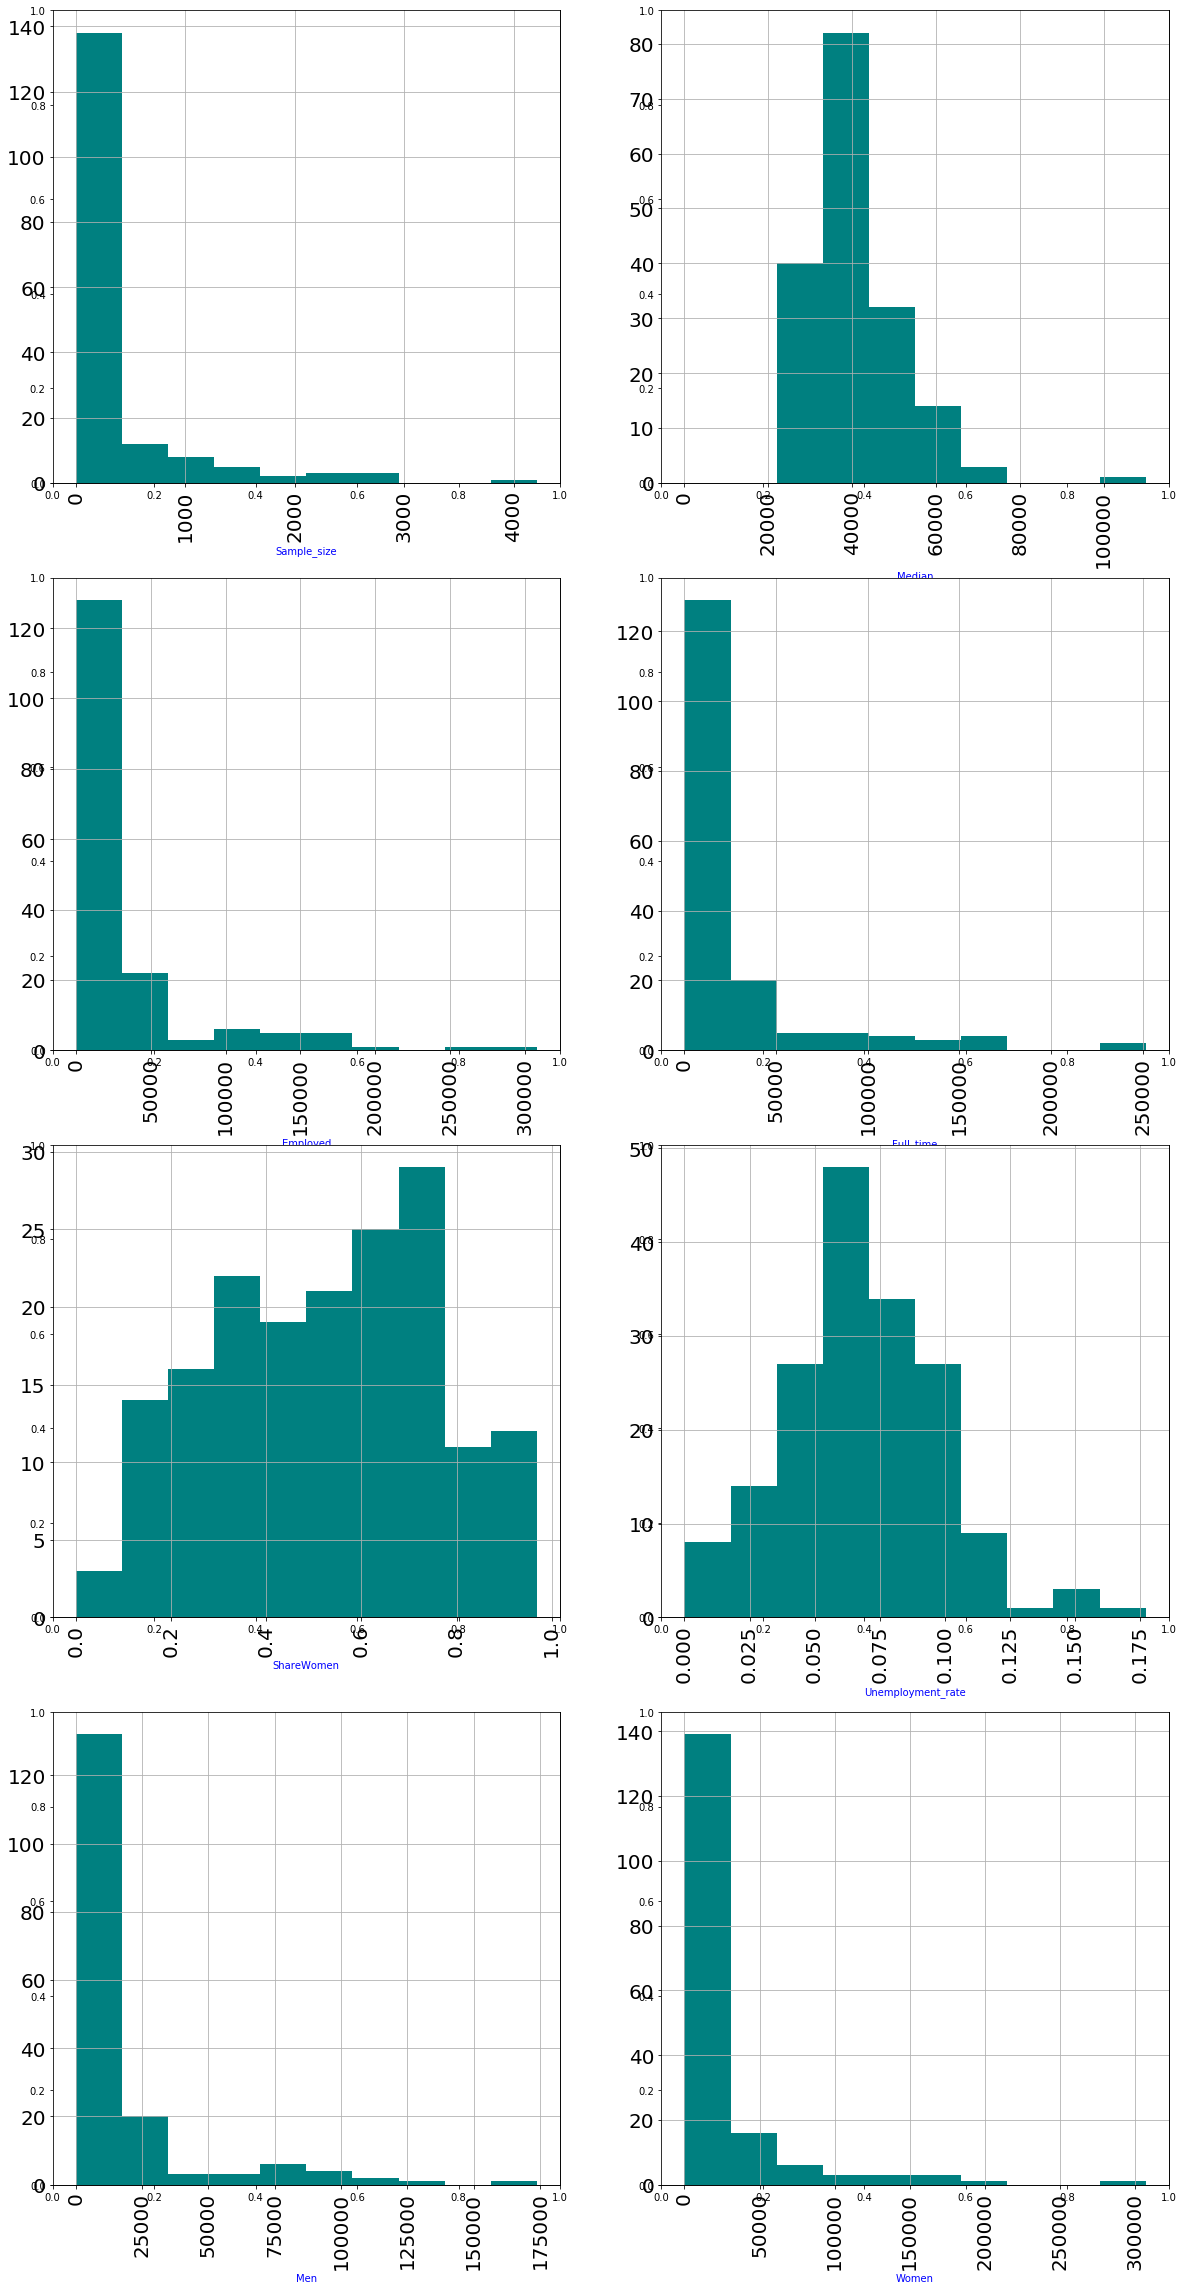

In [10]:
n_cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", 
          "Unemployment_rate", "Men", "Women"]
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 40))
for col in range(len(n_cols)):
    fig.add_subplot(4, 2, col+1)
    ax = recent_grads[n_cols[col]].hist(bins=10, range=(0, max(recent_grads[n_cols[col]]))
                                        , color="teal", xrot=90, xlabelsize=20, 
                                        ylabelsize=20)
    ax.set_xlabel(n_cols[col], fontsize=10, color="blue")

## Scatter Matrix Plot

We created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff478b1ce10>,
      dtype=object)

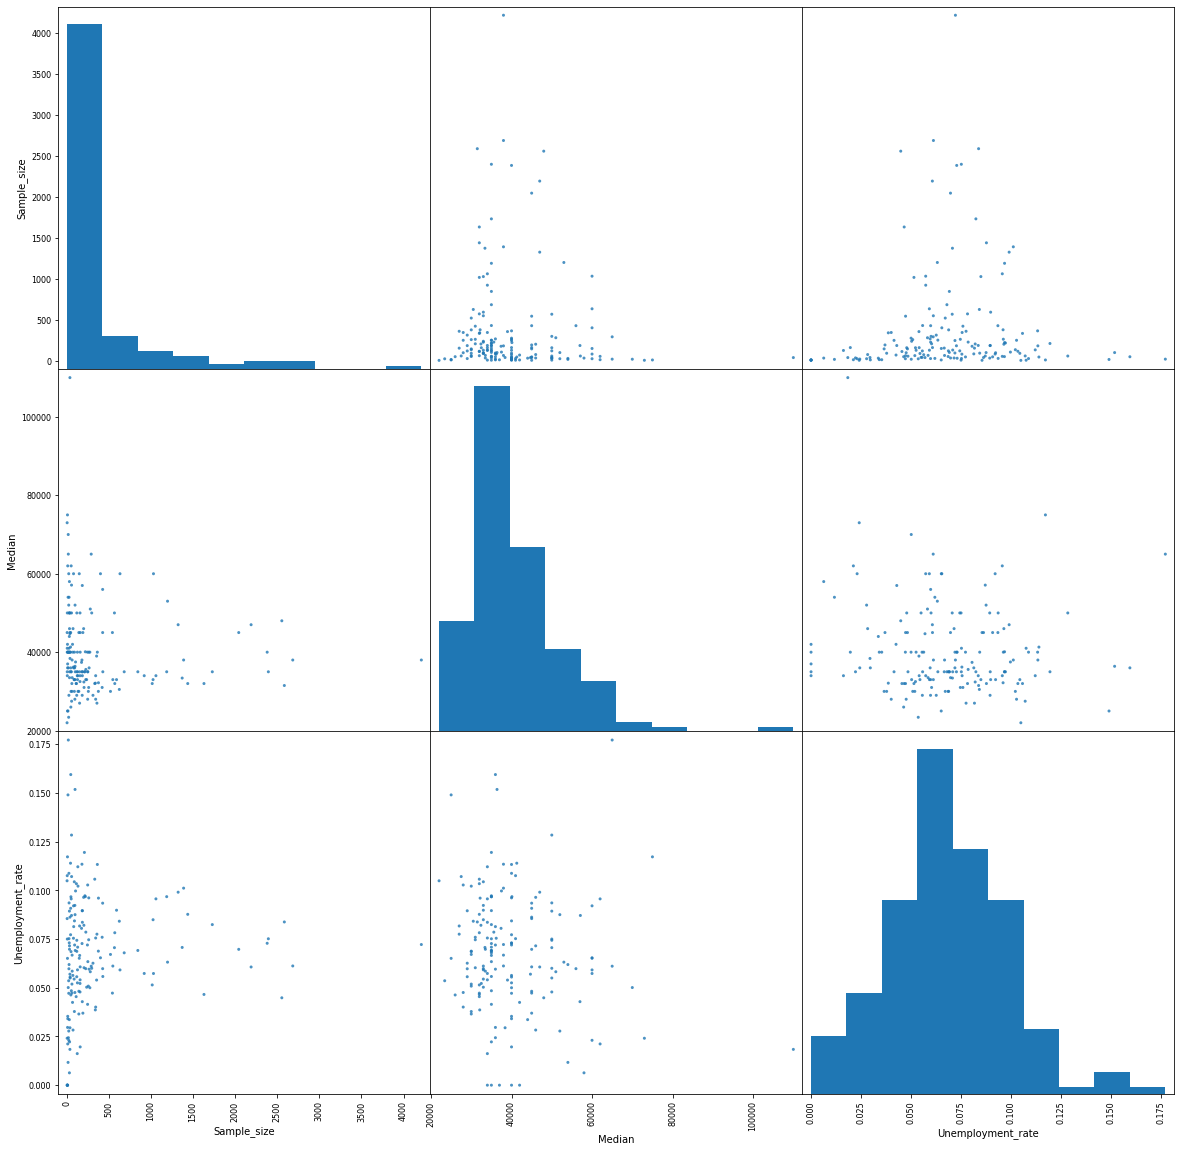

In [11]:
#plt.style.use('ggplot')
pd.plotting.scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]],
                           figsize=(20, 20), alpha=.8, grid=False)




## add data here about the results of the data above

££££££££££££££££££

££££££££££££££££££

£££££££££££££££££

£££££££££££££££££


# Bar Plots



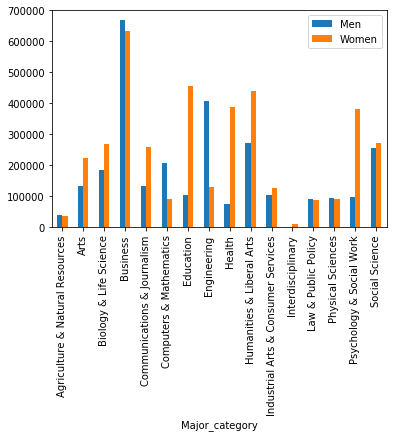

In [12]:

### Pivot table to aggregate the values of men and woman for each major ###
major_category_men_women=recent_grads.pivot_table(index="Major_category",
                                                  values=["Men","Women"],aggfunc=np.sum)
major_category_men_women

major_category_men_women.plot(kind="bar")

Text(0.5, 0, 'ShareWomen')

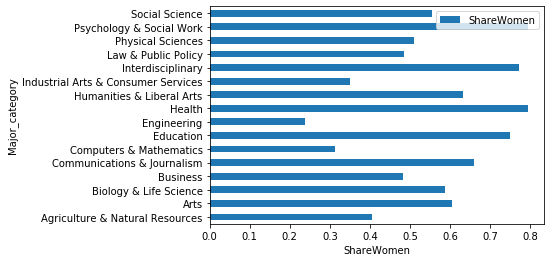

In [13]:
sharewomen_major_category=recent_grads.groupby("Major_category")[["ShareWomen"]].agg("mean").plot.barh()
sharewomen_major_category.set_xlabel("ShareWomen")

Most common median salary range is 30000 to 40000. To know in greater detail the below graph represents graph represent 30800 to 39600 as the most common range,

In [14]:
most_common_median_salary=pd.cut(recent_grads["Median"],bins=10).value_counts()
most_common_median_salary

(30800.0, 39600.0]      75
(39600.0, 48400.0]      40
(21912.0, 30800.0]      24
(48400.0, 57200.0]      18
(57200.0, 66000.0]      11
(66000.0, 74800.0]       2
(101200.0, 110000.0]     1
(74800.0, 83600.0]       1
(92400.0, 101200.0]      0
(83600.0, 92400.0]       0
Name: Median, dtype: int64

Bar plots to :
1. Compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.
2. Compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

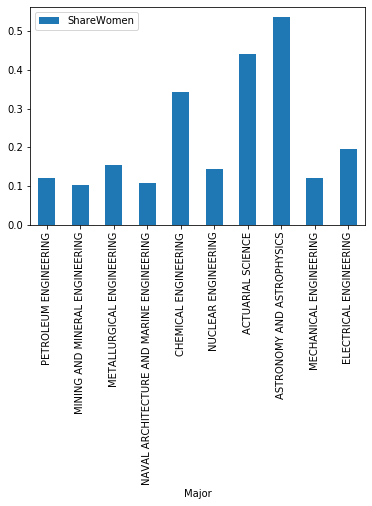

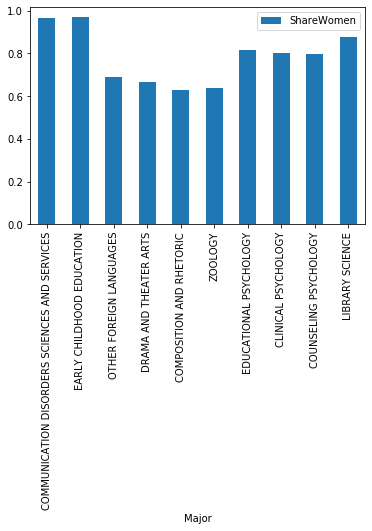

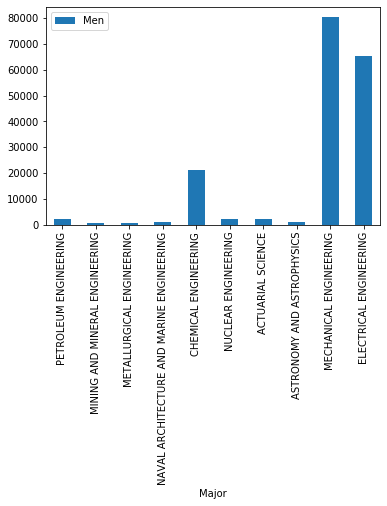

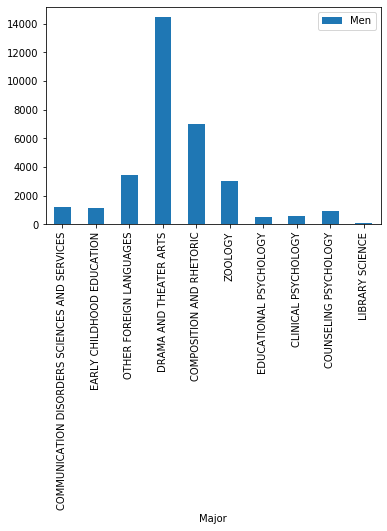

In [15]:
recent_grads.head(10).plot.bar(x="Major",y="ShareWomen")
recent_grads.tail(10).plot.bar(x="Major",y="ShareWomen")
recent_grads.head(10).plot.bar(x="Major",y="Men")
recent_grads.tail(10).plot.bar(x="Major",y="Men")